In [1]:
from delfos.market.session import Session
from delfos.broker.portfolio import Portfolio
from datetime import datetime
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd

In [2]:
dt = datetime(2021, 7, 21)

session = Session(period=6)
#session = Session(date=dt, period=4)

In [3]:
carteira = Portfolio(session)

In [4]:
for position in carteira.positions:
    print("{}: qtd = {}, preco = {}, valor inicial = {}, valor atual = {}".format(position, carteira.positions[position].quantity, carteira.positions[position].price_per_share, carteira.positions[position].held_shares_cost, carteira.positions[position].held_shares_value))
    print( "Rentabilidade:", '{:,.2f}%'.format(carteira.positions[position].total_return * 100))
    print("Valor ganho:", carteira.positions[position].total_income)
    print()
print()
print("Valor gasto:", '{:,.2f}'.format(carteira.total_cost))
print()
print("Valor ganho:", '{:,.2f}'.format(carteira.total_income))
print()
print("Valor atual:", '{:,.2f}'.format(carteira.held_shares_value))
print()
print("Diferença:", '{:,.2f}'.format(carteira.total_change))
print()
print("Rentabilidade:", '{:,.2f}%'.format(carteira.total_return*100))

PETR4: qtd = 91, preco = 16.80956043956044, valor inicial = 1529.6699999999998, valor atual = 2778.230062484741
Rentabilidade: 226.59%
Valor ganho: 2217.4599999999996

BPAC11: qtd = 556, preco = 10.570179856115109, valor inicial = 5877.02, valor atual = 18464.759490966797
Rentabilidade: 224.81%
Valor ganho: 624.3299999999999

AZUL4: qtd = 86, preco = 21.94046511627907, valor inicial = 1886.88, valor atual = 1498.1200065612793
Rentabilidade: -20.60%
Valor ganho: 0

CVCB3: qtd = 66, preco = 15.2, valor inicial = 1003.1999999999999, valor atual = 197.34000062942505
Rentabilidade: -80.33%
Valor ganho: 0

FLRY3: qtd = 57, preco = 22.75989974937343, valor inicial = 1297.3142857142857, valor atual = 900.0299978256226
Rentabilidade: -22.79%
Valor ganho: 101.64

MYPK3: qtd = 66, preco = 15.3, valor inicial = 1009.8000000000001, valor atual = 935.8800201416016
Rentabilidade: 5.25%
Valor ganho: 126.94999999999999

ARZZ3: qtd = 19, preco = 56.365789473684224, valor inicial = 1070.9500000000003, va

In [5]:
carteira.positions

rets_dict = {k: v for k, v in zip(carteira.positions.keys(), [v.total_return*100 for v in carteira.positions.values()])}
{k: v for k, v in sorted(rets_dict.items(), key=lambda item: item[1], reverse=True)}

{'PETR4': 226.58613050427476,
 'BPAC11': 224.80899317965225,
 'BBAS3': 89.63401956984268,
 'TSLA34': 49.42434742964432,
 'ARZZ3': 47.51762887032246,
 'ITSA4': 16.357077599066418,
 'M1TA34': 14.17356540057504,
 'BCFF11': 12.17860442549937,
 'JSRE11': 8.896334384015212,
 'MYPK3': 5.251536952030257,
 'RDOR3': 4.3620484921442815,
 'VRTA11': 1.4315034802345528,
 'NUBR33': -7.714822419291421,
 'VALE3': -8.021505166583058,
 'BBDC4': -13.795115901588515,
 'AZUL4': -20.60332365803447,
 'FLRY3': -22.78894876470777,
 'AMZO34': -29.12148009234727,
 'BRKM5': -35.273973406680135,
 'CASH3': -65.15789366604989,
 'CVCB3': -80.32894730567932,
 'MGLU3': -85.37483340405905}

In [6]:
carteira.failed_positions

[]

In [7]:
port_hist = carteira.portfolio_history

#CONSERTOS DE DATAS AUSENTES NO HISTORICO BAIXADO DO YFINANCE
port_hist = port_hist.drop(index=(datetime(2023, 3, 10))) #yfinance não manda o historico de BPAC11 no dia 10/03/2023
#port_hist = port_hist.drop(index=(datetime(2023, 7, 27)))

#port_hist[(port_hist["Cash Flow"]> 0) | (port_hist["Cash Flow"]< 0)]
#port_hist[(port_hist.index.year == 2023) & (port_hist.index.month == 3)]
port_hist

,Close,Cost,Close (no income),Cash Flow,Daily Change w/ CF,Daily Change,Total change,Pct Change w/ CF,Daily Ret,Total Ret
2020-03-12,159.968002,553.600000,159.968002,553.6,NaN,NaN,-393.631998,NaN,NaN,-0.711040
2020-03-13,195.516464,553.600000,195.516464,0.0,35.548462,35.548462,-358.083536,0.222222,0.222222,-0.646827
2020-03-16,4059.938799,5560.000000,4059.938799,5006.4,3864.422335,-1141.977665,-1500.061201,19.765202,-0.219530,-0.269795
2020-03-17,3988.356741,5560.000000,3988.356741,0.0,-71.582058,-71.582058,-1571.643259,-0.017631,-0.017631,-0.282670
2020-03-18,3722.257739,6128.000000,3722.257739,568.0,-266.099002,-834.099002,-2405.742261,-0.066719,-0.183063,-0.392582
...,...,...,...,...,...,...,...,...,...,...
2023-07-27,49751.796121,36860.893939,45465.266121,0.0,-539.350437,-539.350437,12890.902182,-0.010725,-0.010725,0.349718
2023-07-28,50102.966422,36860.893939,45816.436422,0.0,351.170301,351.170301,13242.072482,0.007058,0.007058,0.359244
2023-07-31,50476.507264,36860.893939,46189.977264,0.0,373.540843,373.540843,13615.613325,0.007455,0.007455,0.369378
2023-08-01,50144.749855,36860.893939,45858.219855,0.0,-331.757409,-331.757409,13283.855916,-0.006573,-0.006573,0.360378


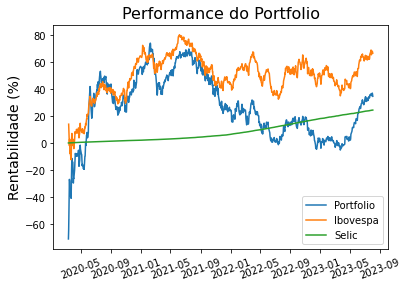

In [8]:
#ANÁLISE DO PORTFOLIO CONTRA O MERCADO E A RENDA FIXA


market_hist = session.market_index.history["Close"][session.market_index.history.index.date >= carteira.first_date]
market_hist = market_hist.drop(index=(datetime(2023, 3, 10))) #yfinance não manda o historico de BPAC11 no dia 10/03/2023


free_risk_hist = session.risk_free_rate_series
free_risk_hist = free_risk_hist[free_risk_hist.index.date >= carteira.first_date]
free_risk_hist = free_risk_hist 


plt.plot(port_hist["Total Ret"]*100, label="Portfolio")
plt.plot((market_hist.pct_change().add(1).cumprod().sub(1) * 100), label="Ibovespa")
plt.plot((free_risk_hist.cumsum()* 100), label="Selic")


#add axes labels and a title
plt.legend()

plt.ylabel('Rentabilidade (%)', fontsize=14)
plt.title('Performance do Portfolio', fontsize=16)

plt.xticks(rotation=20)

#plt.margins(0.2)
  
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.1)

plt.show()

In [9]:
print("Rentabilidades (TOTAL):\n")

print("Ibov: ", round(float( (market_hist.pct_change().add(1).cumprod().sub(1)).iloc[-1]),4)*100, "%")
print("Portfolio: ", round(carteira.total_return, 4)*100, "%")
print("Selic: ", round(float(free_risk_hist.cumsum().iloc[-1]), 4)*100, "%")

port_cdi = round(float((carteira.total_return * 100) / free_risk_hist.cumsum().iloc[-1]), 2)

print("Portfolio (CDI): ", port_cdi, "%")

Rentabilidades (TOTAL):

Ibov:  66.51 %
Portfolio:  34.56 %
Selic:  24.36 %
Portfolio (CDI):  141.87 %


In [ ]:
pos = carteira.positions["BPAC11"]
#pos.history[(pos.history.index.year == 2023) & (pos.history.index.month == 3)]
pos.history
#pos.history[pos.history["Cash Flow"]> 0]

In [ ]:
stock = session.select_stocks("BPAC11")

In [ ]:
stock.history

In [ ]:
stock.current_price

### Testes com o Portfolio Total (cash.json)

In [ ]:
#--------------------------------- TESTES COM PORTFOLIO TOTAL (CASH_FILE) ----------------------------------------------


import pandas as pd
import json

with open("./delfos/data/broker/cash.json", "r") as cash_file:
    cash_data = json.load(cash_file)
    
net_data_hist = []
for data in cash_data:
    date = data["date"]
    available_cash = data["available_cash"]
    net_data = data["net_worth"]
    
    if net_data["broker"] < 0:
        net_data["broker"] = 0
        
    net_data.update({"date": date})
    net_data_hist.append(net_data)

df = pd.DataFrame(net_data_hist).set_index("date")
df.index = pd.to_datetime(df.index, format="%d-%m-%Y")

df = df.merge(carteira.portfolio_history["Close (no income)"], left_index=True, right_index=True, how="outer")

df = df.rename(columns={"Close (no income)": "stocks"})

df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
#df = df.dropna()

df["total"] = df.sum(axis=1)
df["total_stocks"] = df["stocks"] + df["stocks_funds"]
df["total_fixed"] = df["bank"] + df["savings"] + df["public_bonds"]

df = df.drop(index=(datetime(2023, 3, 10))) #yfinance não manda o historico de BPAC11 no dia 10/03/2023

In [ ]:
df

In [ ]:
df["total"]

In [ ]:
df["total"].plot()

In [ ]:
for col in df.columns[:-3]:
    pct = df.iloc[-1][col] / df.iloc[-1]["total"]
    print(col + ": " + str(round(pct*100, 2)) + "%")

In [ ]:
stocks_pct = df.iloc[-1]["total_stocks"] / df.iloc[-1]["total"]
fixed_pct = df.iloc[-1]["total_fixed"] / df.iloc[-1]["total"]
cash_pct = df.iloc[-1]["broker"] / df.iloc[-1]["total"]

print("Stocks: ", round(stocks_pct * 100, 2), "%")
print("Fixed Income: ", round(fixed_pct * 100, 2), "%")
print("Cash: ", round( cash_pct * 100, 2), "%")